<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_course/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier

1)

In [110]:
df = pd.read_csv("wine-missing.csv")

In [111]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

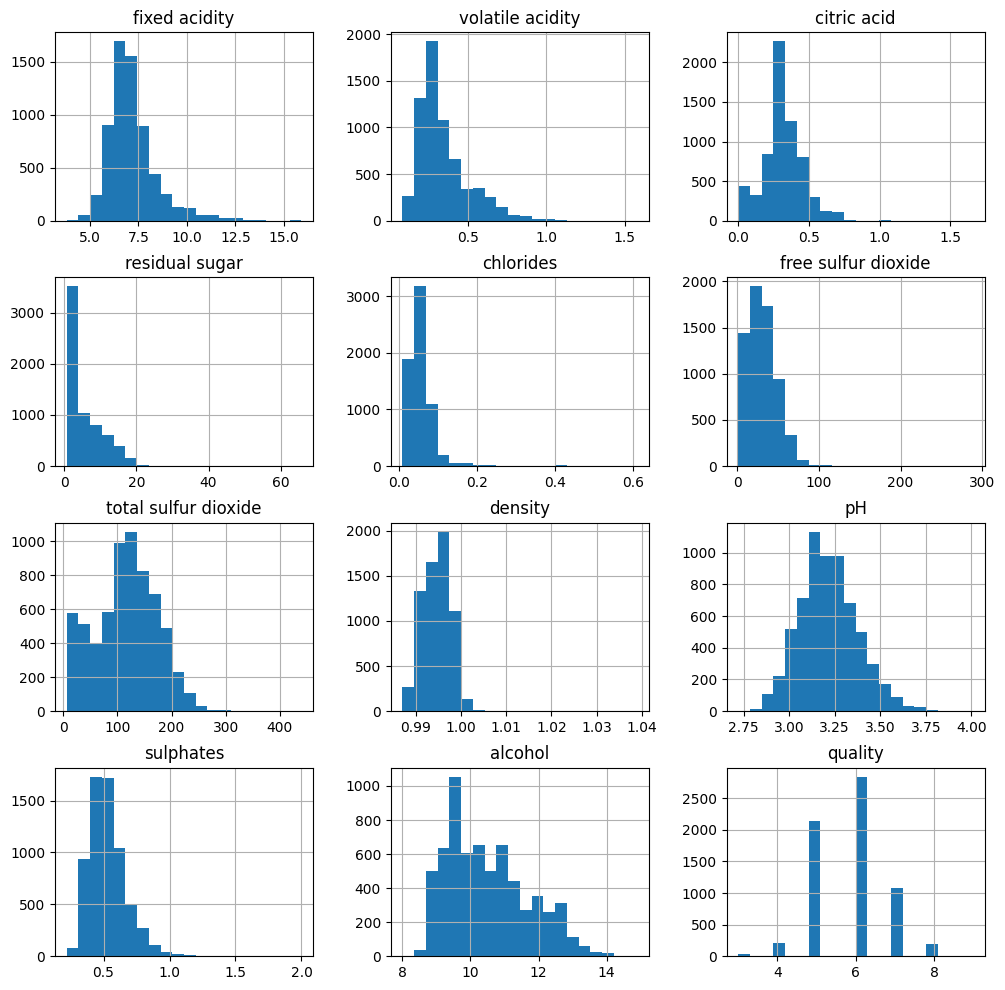

In [112]:
df.hist(bins=20, figsize=(12,12))

<Axes: ylabel='type'>

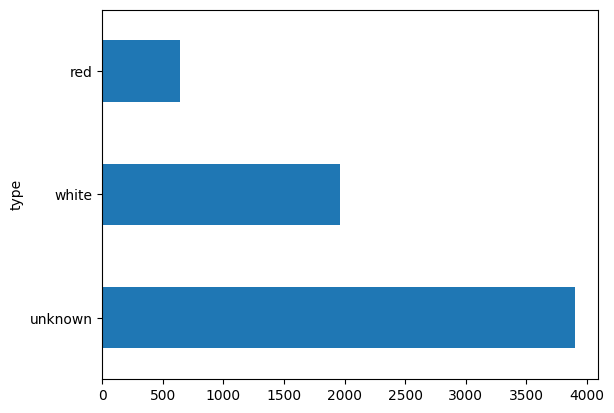

In [113]:
df["type"].value_counts().plot(kind="barh")

2)


In [114]:
df.type[df["type"] == "white"] = 0
df.type[df["type"] == "red"] = 1
df.type[df["type"] == "unknown"] = 2
df




/tmp/ipython-input-2889208521.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.type[df["type"] == "white"] = 0
/tmp/ipython-input-2889208521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [115]:
x = df.iloc[:,1:]
x_data = x.to_numpy()
y = df.iloc[:,0]
y_data = y.to_numpy()


3)

In [116]:
unknown = df[df['type'] == 2]
unknown_x = unknown.iloc[:,1:]
x_unknown = unknown_x.to_numpy()
known = df[df['type'] != 2]
known_x = known.iloc[:,1:]
x_known = known_x.to_numpy()
known_y = known.iloc[:,0]
y_known = known_y.to_numpy()
for x in y_known:
  print(x)






0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


4)

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known.astype(int), test_size=0.3, random_state=42, stratify=y_known)


5)

In [118]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [119]:
def show_metrics(y_true, y_pred):
  print("Accuracy:", accuracy_score(y_true, y_pred))
  print("Precision:", precision_score(y_true, y_pred, average='weighted'))
  print("Recall:", recall_score(y_true, y_pred, average='weighted'))
  print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nConfusion Matrix:")
  print(confusion_matrix(y_true, y_pred))
  print("\nClassification Report:")
  print(classification_report(y_true, y_pred))

In [120]:
print("metrics in train:\n")
show_metrics(y_train, y_pred_train)
print("metrics in test:\n")
show_metrics(y_test, y_pred_test)

metrics in train:

Accuracy: 0.999450247388675
Precision: 0.9994514717820188
Recall: 0.999450247388675
F1 Score: 0.9994504535450379

Confusion Matrix:
[[1370    1]
 [   0  448]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1371
           1       1.00      1.00      1.00       448

    accuracy                           1.00      1819
   macro avg       1.00      1.00      1.00      1819
weighted avg       1.00      1.00      1.00      1819

metrics in test:

Accuracy: 0.9987179487179487
Precision: 0.9987245914707055
Recall: 0.9987179487179487
F1 Score: 0.9987190681658766

Confusion Matrix:
[[587   1]
 [  0 192]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       0.99      1.00      1.00       192

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780


Δεν μπορούμε να πούμε ποιά είναι πιο αντιπροσωπευτική σχεδόν το ίδιο βγαίνουν και οι δύο μετρικές

6)

In [121]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("metrics in train:\n")
show_metrics(y_train, y_pred_train)
print("metrics in test:\n")
show_metrics(y_test, y_pred_test)

metrics in train:

Accuracy: 0.999450247388675
Precision: 0.9994514717820188
Recall: 0.999450247388675
F1 Score: 0.9994504535450379

Confusion Matrix:
[[1370    1]
 [   0  448]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1371
           1       1.00      1.00      1.00       448

    accuracy                           1.00      1819
   macro avg       1.00      1.00      1.00      1819
weighted avg       1.00      1.00      1.00      1819

metrics in test:

Accuracy: 0.9948717948717949
Precision: 0.9948713374047896
Recall: 0.9948717948717949
F1 Score: 0.9948627235660897

Confusion Matrix:
[[587   1]
 [  3 189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       588
           1       0.99      0.98      0.99       192

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780


χωρίζει ισομερώς τα παραδείγματα με βάση τα labels

7)

In [122]:
y_unknown_proba=model.predict_proba(x_unknown)

for x in y_unknown_proba:
  print(x)

[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.95 0.05]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.98 0.02]
[1. 0.]
[1. 0.]
[0.86 0.14]
[0.99 0.01]
[0.98 0.02]
[1. 0.]
[0.99 0.01]
[0.87 0.13]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.99 0.01]
[1. 0.]
[0.96 0.04]
[0.99 0.01]
[0.93246289 0.06753711]
[0.96 0.04]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.94 0.06]
[1. 0.]
[1. 0.]
[0.99 0.01]
[1. 0.]
[1. 0.]
[0.94 0.06]
[1. 0.]
[0.96 0.04]
[0.86 0.14]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.92 0.08]
[0.99 0.01]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.98 0.02]
[1. 0.]
[0.99 0.01]
[0.63 0.37]
[1. 0.]
[0.97 0.03]
[0.97 0.03]
[1. 0.]
[0.95 0.05]
[1. 0.]
[1. 0.]
[0.99 0.01]
[0.99 0.01]
[0.96 0.04]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.81 0.19]
[1. 0.]
[1. 0.]
[1. 0.]
[0.99 0.01]
[0.96 0.04]
[0.94 0.06]
[1. 0.]
[0.98 0.02]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.99 0.01]
[1. 

8)

In [123]:
y_unknown_pred = []
x_new_known = []
for i in range(len(y_unknown_proba)):
  if y_unknown_proba[i][0] > 0.65:
    y_unknown_pred.append(1)
    x_new_known.append(x_unknown[i])
  elif y_unknown_proba[i][0] < 0.35:
    y_unknown_pred.append(0)
    x_new_known.append(x_unknown[i])
y_unknown_pred = np.array(y_unknown_pred)
x_new_known = np.array(x_new_known)
all_train_x = np.concatenate((x_train, x_new_known), axis=0)
all_train_y = np.concatenate((y_train, y_unknown_pred), axis=0)




9)

In [124]:
model.fit(all_train_x, all_train_y)
y_pred_train = model.predict(all_train_x)
y_pred_test = model.predict(x_test)
print("metrics in train:\n")
show_metrics(all_train_y, y_pred_train)
print("metrics in test:\n")
show_metrics(y_test, y_pred_test)

metrics in train:

Accuracy: 0.9302859159901165
Precision: 0.9311624732103437
Recall: 0.9302859159901165
F1 Score: 0.9304894376481309

Confusion Matrix:
[[2126  153]
 [ 242 3145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2279
           1       0.95      0.93      0.94      3387

    accuracy                           0.93      5666
   macro avg       0.93      0.93      0.93      5666
weighted avg       0.93      0.93      0.93      5666

metrics in test:

Accuracy: 0.15128205128205127
Precision: 0.2772217981410276
Recall: 0.15128205128205127
F1 Score: 0.17551512689324208

Confusion Matrix:
[[ 84 504]
 [158  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.14      0.20       588
           1       0.06      0.18      0.09       192

    accuracy                           0.15       780
   macro avg       0.21      0.16      0.15      

Συγγνώμη λόγω δουλειάς δεν πρόλαβα...